xESMF Test - MPI-ESM1-2 MPIOM (HR: TP04, ~0.5°; LR: GR15, ~1.5°)
================

### Basic Imports

In [1]:
%matplotlib inline
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe
from clisops.core import subset
import clisops as cl
print("Using roocs/clisops in version %s" % cl.__version__)
print("Using xESMF in version %s" % xe.__version__)

xr.set_options(display_style='html');

Using roocs/clisops in version 0.3.1
Using xESMF in version 0.4.0


### Load the datasets

In [2]:
# Load intake catalogue
col_url = "/work/ik1017/Catalogs/mistral-cmip6.json"
col = intake.open_esm_datastore(col_url)

# Select tas_Amon and fx_areacella for LR and HR model resolution
#  and historical, ssp585
cat = col.search(activity_id=["ScenarioMIP"], 
                 source_id=["MPI-ESM1-2-HR", "MPI-ESM1-2-LR"],
                 experiment_id=["ssp585"], 
                 member_id="r1i1p1f1", 
                 variable_id=["tos", "areacella", "areacello"],
                 table_id=["Omon", "fx", "Ofx"])

In [3]:
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path
0,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Ofx,areacello,gn,NaN,v20190710,NaN,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
1,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,201501-201912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
2,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,202001-202412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
3,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,202501-202912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
4,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,203001-203412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
5,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,203501-203912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
6,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,204001-204412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
7,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,204501-204912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
8,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,205001-205412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...
9,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Omon,tos,gn,NaN,v20190710,205501-205912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/Sce...


In [4]:
dset_dict = cat.to_dataset_dict(cdf_kwargs={'chunks': {}, 'decode_times': True})

for dict_key in dset_dict.keys(): print(dict_key)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.fx.gn
ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.fx.gn
ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Ofx.gn
ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Ofx.gn
ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Omon.gn
ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Omon.gn


In [5]:
# Avoid single value coords
#ds = ds.squeeze()               # Remove single-value dimensions from variables
#ds = ds.reset_coords(drop=True) # Remove unused coordinate entries from ds 
                                 # (drops also the "wrong" coordinates (latitude, longitude))

# Select last 20 years of ssp585
ds_sspLR = dset_dict['ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Omon.gn'].sel(time=slice('2081', '2100')).squeeze()
ds_sspHR = dset_dict['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Omon.gn'].sel(time=slice('2081', '2100')).squeeze()
# Select gridcell area
ds_gridLR = dset_dict['ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.fx.gn'].squeeze()
ds_gridHR = dset_dict['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.fx.gn'].squeeze()
ds_gridOceLR = dset_dict['ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Ofx.gn'].squeeze()
ds_gridOceHR = dset_dict['ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Ofx.gn'].squeeze()

### Take a look at the grids

In [6]:
ds_sspHR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 802, j: 404, time: 240, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 397 398 399 400 401 402 403
  * i                   (i) int32 0 1 2 3 4 5 6 ... 795 796 797 798 799 800 801
    latitude            (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(404, 802), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(48, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(404, 802, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(48, 404, 802), meta=np.ndarray>
Attributes:
    physics_index:           1
    branch_method:           standard
    initialization_index:    1
    nominal_resolution:      50 km
    contact:                 cmip6-mpi-esm@dkrz.de
    Conventions:             CF-1.7 CMIP-6.2
    experiment_id:           ssp585
    forcing_index:           1
    history:                 2019-07-21T06:23:28Z ; CMOR rewrote data to be c...
    institution:             Deutsches Klimarechenzentrum, Hamburg 20146, Ger...
    intake_esm_varname:      ['tos']
    activity_id:             ScenarioMIP
    parent_mip_era:          CMIP6
    parent_experiment_id:    historical
    branch_time_in_child:    60265.0
    title:                   MPI-ESM1-2-HR output prepared for CMIP6
    source_id:               MPI-ESM1-2-HR
    realm:                   ocean
    tracking_id:             hdl:21.14100/c83e53c9-7861-4468-b7fd-93823259b64...
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    source_type:             AOGCM
    parent_activity_id:      CMIP
    variable_id:             tos
    parent_source_id:        MPI-ESM1-2-HR
    data_specs_version:      01.00.30
    cmor_version:            3.4.0
    project_id:              CMIP6
    external_variables:      areacello
    institution_id:          DKRZ
    variant_label:           r1i1p1f1
    realization_index:       1
    frequency:               mon
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    mip_era:                 CMIP6
    sub_experiment_id:       none
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.DKRZ.MPI-ES...
    sub_experiment:          none
    parent_time_units:       days since 1850-1-1 00:00:00
    product:                 model-output
    grid:                    gn
    license:                 CMIP6 model data produced by DKRZ is licensed un...
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    branch_time_in_parent:   60265.0
    parent_variant_label:    r1i1p1f1
    table_id:                Omon
    grid_label:              gn
    experiment:              update of RCP8.5 based on SSP5
    intake_esm_dataset_key:  ScenarioMIP.DKRZ.MPI-ESM1-2-HR.ssp585.Omon.gn

In [7]:
ds_sspLR

<xarray.Dataset>
Dimensions:             (bnds: 2, i: 256, j: 220, time: 240, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 2081-01-16T12:00:00 ... 2100-12...
  * j                   (j) int32 0 1 2 3 4 5 6 ... 213 214 215 216 217 218 219
  * i                   (i) int32 0 1 2 3 4 5 6 ... 249 250 251 252 253 254 255
    latitude            (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(220, 256), meta=np.ndarray>
    member_id           <U8 'r1i1p1f1'
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(168, 2), meta=np.ndarray>
    vertices_latitude   (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    vertices_longitude  (j, i, vertices) float64 dask.array<chunksize=(220, 256, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(168, 220, 256), meta=np.ndarray>
Attributes:
    physics_index:           1
    branch_method:           standard
    creation_date:           2019-11-12T08:14:09Z
    initialization_index:    1
    nominal_resolution:      250 km
    contact:                 cmip6-mpi-esm@dkrz.de
    Conventions:             CF-1.7 CMIP-6.2
    experiment_id:           ssp585
    forcing_index:           1
    history:                 2019-11-11T15:58:26Z ; CMOR rewrote data to be c...
    institution:             Max Planck Institute for Meteorology, Hamburg 20...
    intake_esm_varname:      ['tos']
    activity_id:             ScenarioMIP
    parent_mip_era:          CMIP6
    parent_experiment_id:    historical
    branch_time_in_child:    60265.0
    title:                   MPI-ESM1-2-LR output prepared for CMIP6
    source_id:               MPI-ESM1-2-LR
    realm:                   ocean
    tracking_id:             hdl:21.14100/e9fc6810-e058-4ff3-91ff-e98783e10e6...
    source:                  MPI-ESM1.2-LR (2017): \naerosol: none, prescribe...
    source_type:             AOGCM
    parent_activity_id:      CMIP
    variable_id:             tos
    parent_source_id:        MPI-ESM1-2-LR
    data_specs_version:      01.00.30
    cmor_version:            3.5.0
    project_id:              CMIP6
    external_variables:      areacello
    institution_id:          MPI-M
    variant_label:           r1i1p1f1
    realization_index:       1
    frequency:               mon
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    mip_era:                 CMIP6
    sub_experiment_id:       none
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    sub_experiment:          none
    parent_time_units:       days since 1850-1-1 00:00:00
    product:                 model-output
    grid:                    gn
    license:                 CMIP6 model data produced by MPI-M is licensed u...
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    branch_time_in_parent:   60265.0
    parent_variant_label:    r1i1p1f1
    table_id:                Omon
    grid_label:              gn
    experiment:              update of RCP8.5 based on SSP5
    intake_esm_dataset_key:  ScenarioMIP.MPI-M.MPI-ESM1-2-LR.ssp585.Omon.gn

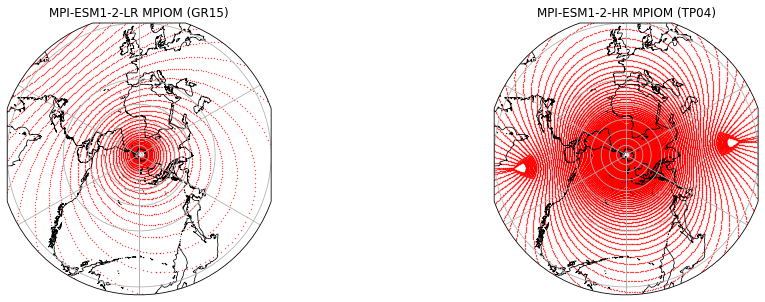

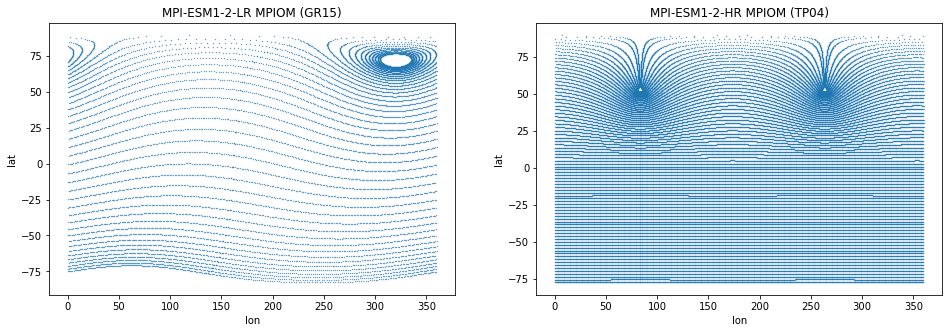

In [8]:
# Plot grid locations LR and HR

# polar projection
def polar_axis():
    '''cartopy geoaxes centered at north pole'''
    # as from https://github.com/JiaweiZhuang/regrid_test/blob/master/debug_bipolar_grid.ipynb
    fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5), 
                             subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=0)})
    axes[0].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[1].coastlines(linewidth=0.75, color='black', resolution='50m')
    axes[0].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[1].gridlines(crs=ccrs.PlateCarree(), linestyle='-')
    axes[0].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    axes[1].set_extent([-180, 180, 60, 90], crs=ccrs.PlateCarree())
    return axes

axes=polar_axis()
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1,
                transform=ccrs.PlateCarree(), c='r')  

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');

# common scatter plot
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))
axes[0].scatter(x=ds_gridOceLR['longitude'][::5], y=ds_gridOceLR['latitude'][::5], s=0.1)
axes[1].scatter(x=ds_gridOceHR['longitude'][::5], y=ds_gridOceHR['latitude'][::5], s=0.1)
#axes[1].scatter(x=ds_gridOceHR['longitude'][204, :], y=ds_gridOceHR['latitude'][204, :], s=0.1)
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');
#axes[1].set_ylim([-10, 10]);
#axes[0].set_ylim([-10, 10]);

### Plot the data

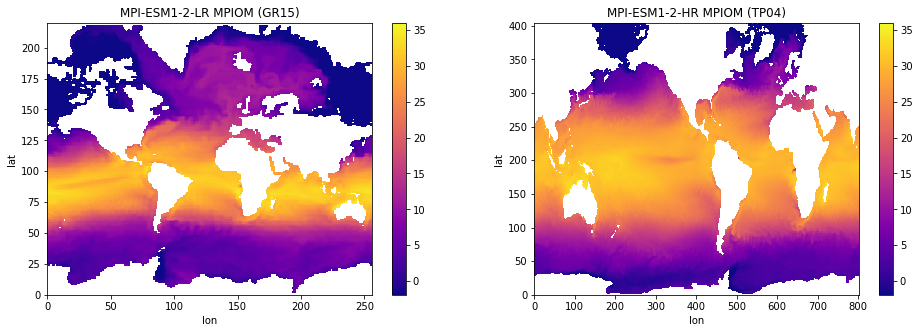

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,5))

im=axes[0].pcolormesh(ds_sspLR.tos.isel(time=0).values[::-1,:], cmap="plasma")
im=axes[1].pcolormesh(ds_sspHR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
fig.colorbar(im, ax=axes[1])
fig.colorbar(im, ax=axes[0])

axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');


#plt.figure(figsize=(16,6));
#ax = plt.axes(projection=ccrs.PlateCarree());
#ds_sspHR.tos.isel(time=0).pcolormesh(ax=ax, x='longitude', y='latitude');
#plt.pcolormesh(ds_sspHR.tos.isel(time=0).values[::-1,:])
#ax.coastlines();

### Set up and perform the regrid operation

In [10]:
# Read the target grid (1deg, SCRIP format provided by 
#   Charlie Zender in course of the CMIP6 regridding weights discussion:
#   https://docs.google.com/document/d/1BfVVsKAk9MAsOYstwFSWI2ZBt5mrO_Nmcu7rLGDuL08/edit
ds_scrip=xr.open_dataset("target_grids/cmip6_180x360_scrip.20181001.nc")
ds_scrip

# Alternatively specify a global 5 deg grid
# ds_out = xe.util.grid_global(5, 5) # global 5 degree grid
# ds_out

<xarray.Dataset>
Dimensions:          (grid_corners: 4, grid_rank: 2, grid_size: 64800)
Dimensions without coordinates: grid_corners, grid_rank, grid_size
Data variables:
    grid_dims        (grid_rank) int32 ...
    grid_area        (grid_size) float64 ...
    grid_imask       (grid_size) int32 ...
    grid_center_lat  (grid_size) float64 ...
    grid_center_lon  (grid_size) float64 ...
    grid_corner_lat  (grid_size, grid_corners) float64 ...
    grid_corner_lon  (grid_size, grid_corners) float64 ...
Attributes:
    title:                Equi-Angular grid 1x1 degree, dimensions 180x360, c...
    Conventions:          SCRIP
    created_by:           zender
    history:              Mon Sep 10 09:34:07 2018: ncks --dmm_in_mk -O --no_...
    NCO:                  netCDF Operators version 4.7.7-alpha03 (Homepage = ...
    latitude_grid_type:   Uniform/Equi-Angular latitude grid. Uniform/Equi-an...
    longitude_grid_type:  Greenwich at west edge of first longitude cell

In [11]:
print(ds_scrip["grid_corner_lon"].values)
print(ds_scrip["grid_corner_lat"].values)

[[  0.   1.   1.   0.]
 [  1.   2.   2.   1.]
 [  2.   3.   3.   2.]
 ...
 [357. 358. 358. 357.]
 [358. 359. 359. 358.]
 [359. 360. 360. 359.]]
[[-90. -90. -89. -89.]
 [-90. -90. -89. -89.]
 [-90. -90. -89. -89.]
 ...
 [ 89.  89.  90.  90.]
 [ 89.  89.  90.  90.]
 [ 89.  89.  90.  90.]]


In [12]:
# SCRIP format seems not to be supported by xESMF (though it is by ESMF)
# -> converting manually to (almost) CF format for a rectilinear grid following
#    https://github.com/JiaweiZhuang/xESMF/issues/5
#    https://github.com/JiaweiZhuang/xESMF/issues/74
#    https://github.com/JiaweiZhuang/xESMF/issues/14#issuecomment-369686779
# The bnds cannot be in CF format, as xESMF conservative regridding requires 
#    certain format of the bnds (see links above)
#  
#  [:,3]     [:,2]
#
#    x---------x
#    |         |
#    |    o    |
#    |         |
#    x---------x
#
#  [:,0]     [:,1]
#
# x - grid cell corners
# o - grid cell center
#
# lat/lon
lat=ds_scrip["grid_center_lat"].values.reshape((180,360))[:, 0]
lon=ds_scrip["grid_center_lon"].values.reshape((180,360))[0, :]

# lower and upper bounds
latb_l=ds_scrip["grid_corner_lat"].values[:, 0].reshape((180,360))[:, 0]
latb_u=ds_scrip["grid_corner_lat"].values[:, 3].reshape((180,360))[:, 0]
lonb_l=ds_scrip["grid_corner_lon"].values[:, 0].reshape((180,360))[0, :]
lonb_u=ds_scrip["grid_corner_lon"].values[:, 1].reshape((180,360))[0, :]

# reshape from (nlat,2) to (nlat+1)
lat_bnds=np.zeros(lat.shape[0]+1, dtype="double")
lat_bnds[:-1]=latb_l[:]
lat_bnds[-1]=latb_u[-1]

# reshape from (nlon,2) to (nlon+1)
lon_bnds=np.zeros(lon.shape[0]+1, dtype="double")
lon_bnds[:-1]=lonb_l[:]
lon_bnds[-1]=lonb_u[-1]
            
# Create dataset
ds_out=xr.Dataset(data_vars={"lat_b":(["lat1"], lat_bnds),
                             "lon_b":(["lon1"], lon_bnds)},
                  coords={"lat":(["lat"], lat),
                          "lon":(["lon"], lon)})

ds_out["lat"].attrs={"bounds":"lat_b",
                     "units":"degrees_north",
                     "long_name":"latitude",
                     "standard_name":"latitude"}
ds_out["lon"].attrs={"bounds":"lon_b",
                     "units":"degrees_east",
                     "long_name":"longitude",
                     "standard_name":"longitude"}
ds_out

<xarray.Dataset>
Dimensions:  (lat: 180, lat1: 181, lon: 360, lon1: 361)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Dimensions without coordinates: lat1, lon1
Data variables:
    lat_b    (lat1) float64 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
    lon_b    (lon1) float64 0.0 1.0 2.0 3.0 4.0 ... 357.0 358.0 359.0 360.0

In [13]:
# Calculate bounds for input grid (assumes variables vertices_latitude, vertices_longitude)
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
def translate_grid_for_xesmf(ds, lat_name="latitude", lon_name="longitude", 
                             lat_vert_name="vertices_latitude", lon_vert_name="vertices_longitude"):
    """Reshapes vertices from (nlat,nlon,4) to (nlat+1,nlon+1). Returns xarray.dataset."""
    lat_bnds=np.zeros(tuple([el+1 for el in list(ds[lat_name].shape)]), dtype="double")
    lat_bnds[:-1, :-1]=ds[lat_vert_name][:,:,3]
    lat_bnds[-1, :-1]=ds[lat_vert_name][-1,:,2]
    lat_bnds[:-1, -1]=ds[lat_vert_name][:,-1,1]
    lat_bnds[-1, -1]=ds[lat_vert_name][-1,-1,0]
    
    lon_bnds=np.zeros(tuple([el+1 for el in list(ds[lon_name].shape)]), dtype="double")
    lon_bnds[:-1, :-1]=ds[lon_vert_name][:,:,3]
    lon_bnds[-1, :-1]=ds[lon_vert_name][-1,:,2]
    lon_bnds[:-1, -1]=ds[lon_vert_name][:,-1,1]
    lon_bnds[-1, -1]=ds[lon_vert_name][-1,-1,0]
    
    ds_xesmf=xr.Dataset(data_vars={"lat_b":(["y1","x1"], lat_bnds),
                                   "lon_b":(["y1","x1"], lon_bnds)},
                        coords={"lat":(["y","x"], ds[lat_name].values),
                                "lon":(["y","x"], ds[lon_name].values)})
    return ds_xesmf

In [14]:
# Calculate corners 
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
#
# From https://nbviewer.jupyter.org/gist/bradyrx/421627385666eefdb0a20567c2da9976
#
def _unravel(new_bounds, vertex_bounds, M, N):
    """
    Helper function to go from the vertex style to
    the M+1, N+1 style of lat/lon bounds.
    """
    new_bounds[0:N, 0:M] = vertex_bounds[:, :, 0]
    
    # fill in missing row
    new_bounds[N, 0:M] = vertex_bounds[N-1, :, 1]
    # fill in missing column
    new_bounds[0:N, M] = vertex_bounds[:, M-1, 2]
    # fill in remaining element
    new_bounds[N, M] = vertex_bounds[N-1, M-1, 3]
    return new_bounds        

def compress_vertices(ds, lat_bnds_name='lat_b', lon_bnds_name='lon_b'):
    """
    Converts (M, N, 4) (lat/lon/vertex) bounds to
    (M+1, N+1) bounds for xESMF.
    """
    M = ds.x.size
    N = ds.y.size
    
    # create arrays for 2D bounds info
    lat_b = np.zeros((N+1, M+1))
    lon_b = np.zeros((N+1, M+1))
    
    # unravel nvertices to 2D style
    lat_b = _unravel(lat_b, ds[lat_bnds_name], M, N)
    lon_b = _unravel(lon_b, ds[lon_bnds_name], M, N)
    
    # get rid of old coordinates
    del ds[lat_bnds_name], ds[lon_bnds_name]
    ds = ds.squeeze()
    
    # assign new coordinates
    ds.coords['lat_b'] = (('y_b', 'x_b'), lat_b)
    ds.coords['lon_b'] = (('y_b', 'x_b'), lon_b)
    return ds

In [15]:
# Calculate corners 
# reshape from (nlat,nlon,4) to (nlat+1,nlon+1)
#
# Taken from https://github.com/NCPP/ocgis/blob/master/src/ocgis/util/helpers.py following:
# https://github.com/JiaweiZhuang/xESMF/issues/32 
# https://gist.github.com/bekozi/79d60cecebfdc1c37c1ed480550fffc2
#
import itertools
def get_esmf_corners_from_ocgis_corners(ocorners, fill=None):
    """
    :param ocorners: Corners array with dimension (m, n, 4).
    :type ocorners: :class:`numpy.ma.core.MaskedArray`
    :returns: An ESMF corners array with dimension (n + 1, m + 1).
    :rtype: :class:`numpy.ndarray`
    """

    if fill is None:
        shp = np.flipud(ocorners.shape[0:2])
        fill = np.zeros([element + 1 for element in shp], dtype=ocorners.dtype)
    range_row = list(range(ocorners.shape[0]))
    range_col = list(range(ocorners.shape[1]))

    if isinstance(ocorners, np.ma.MaskedArray):
        _corners = ocorners.data
    else:
        _corners = ocorners

    for ii, jj in itertools.product(range_row, range_col):
        ref = fill[jj:jj + 2, ii:ii + 2]
        ref[0, 0] = _corners[ii, jj, 0]
        ref[1, 0] = _corners[ii, jj, 1]
        ref[1, 1] = _corners[ii, jj, 2]
        ref[0, 1] = _corners[ii, jj, 3]
    return fill

In [16]:
print(ds_sspHR.vertices_longitude.values[0, 0, :])
print(ds_sspHR.vertices_latitude.values[0, 0, :])

print(ds_sspLR.vertices_longitude.values[0, 0, :])
print(ds_sspLR.vertices_latitude.values[0, 0, :])

[83.00573511 82.99961474 83.0393011  83.04235997]
[51.48815145 51.3913113  51.39062197 51.48753549]
[313.52865989 313.31469397 312.85375182 313.08163767]
[76.3820533  76.48892527 76.43582055 76.33065613]


In [17]:
# Use one of above functions to translate the input grid
#  to be conformal with xESMF
ds_in_LR=translate_grid_for_xesmf(ds_sspLR)
ds_in_HR=translate_grid_for_xesmf(ds_sspHR)

In [18]:
# Create regridding weights
# Fixes applied: https://github.com/JiaweiZhuang/xESMF/pull/61
# from https://github.com/JiaweiZhuang/xESMF/issues/60

# In case of problems, activate ESMF verbose mode
import ESMF
ESMF.Manager(debug=True)

# Regridding methods
method_list = ['bilinear','nearest_s2d', 'conservative', 'conservative_normed', 'patch']

# Function to generate the weights
def regrid(ds_in, ds_out, method, periodic=False, ignore_degenerate=None):
    """Convenience function for calculating regridding weights"""
    return xe.Regridder(ds_in, ds_out, method, ignore_degenerate=ignore_degenerate) 

# Generating the weights for LR_to_destination, HR_to_destination regridding for each selected method
#   Both grids have problems of degenerated cells near the poles and thus require the ignore_degenerate option
regridderLR={}
regridderHR={}
for method in method_list:
    print()
    %time regridderLR[method]=regrid(ds_in_LR, ds_out, method, periodic=True, ignore_degenerate=True)    
    print(regridderLR[method])  
    print()
    %time regridderHR[method]=regrid(ds_in_HR, ds_out, method, periodic=True, ignore_degenerate=True)
    print(regridderHR[method])  


CPU times: user 1.69 s, sys: 81 ms, total: 1.77 s
Wall time: 1.77 s
xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_220x256_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (220, 256) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

CPU times: user 4.21 s, sys: 152 ms, total: 4.36 s
Wall time: 4.36 s
xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_404x802_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (404, 802) 
Output grid shape:          (180, 360) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

CPU times: user 376 ms, sys: 29 ms, total: 405 ms
Wall time: 404 ms
xESMF Regridder 
Regridding algorithm:       nearest_s2d 
Weight filename:            nearest_s2d_220x256_180x360.nc 
Reuse pre-computed weights? False 
Input grid shape:           (

In [19]:
# Save to disk for later use:
for method in method_list: 
    print(regridderLR[method].filename)
    print(regridderHR[method].filename)
    #weights.to_netcdf(regridderLR[method].filename)
    #weights.to_netcdf(regridderHR[method].filename)

bilinear_220x256_180x360.nc
bilinear_404x802_180x360.nc
nearest_s2d_220x256_180x360.nc
nearest_s2d_404x802_180x360.nc
conservative_220x256_180x360.nc
conservative_404x802_180x360.nc
conservative_normed_220x256_180x360.nc
conservative_normed_404x802_180x360.nc
patch_220x256_180x360.nc
patch_404x802_180x360.nc


In [20]:
# Perform regridding
for method in method_list:
    ds_out["tos_LR_"+method]=regridderLR[method](ds_sspLR.tos)
    ds_out["tos_HR_"+method]=regridderHR[method](ds_sspHR.tos)
ds_out

/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be r

<xarray.Dataset>
Dimensions:                     (lat: 180, lat1: 181, lon: 360, lon1: 361, time: 240)
Coordinates:
  * lat                         (lat) float64 -89.5 -88.5 -87.5 ... 88.5 89.5
  * lon                         (lon) float64 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                        (time) datetime64[ns] 2081-01-16T12:00:00 ......
    member_id                   <U8 'r1i1p1f1'
Dimensions without coordinates: lat1, lon1
Data variables:
    lat_b                       (lat1) float64 -90.0 -89.0 -88.0 ... 89.0 90.0
    lon_b                       (lon1) float64 0.0 1.0 2.0 ... 358.0 359.0 360.0
    tos_LR_bilinear             (time, lat, lon) float64 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    tos_HR_bilinear             (time, lat, lon) float64 dask.array<chunksize=(48, 180, 360), meta=np.ndarray>
    tos_LR_nearest_s2d          (time, lat, lon) float64 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    tos_HR_nearest_s2d          (time, lat, lon) float64 dask.array<chunksize=(48, 180, 360), meta=np.ndarray>
    tos_LR_conservative         (time, lat, lon) float64 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    tos_HR_conservative         (time, lat, lon) float64 dask.array<chunksize=(48, 180, 360), meta=np.ndarray>
    tos_LR_conservative_normed  (time, lat, lon) float64 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    tos_HR_conservative_normed  (time, lat, lon) float64 dask.array<chunksize=(48, 180, 360), meta=np.ndarray>
    tos_LR_patch                (time, lat, lon) float64 dask.array<chunksize=(168, 180, 360), meta=np.ndarray>
    tos_HR_patch                (time, lat, lon) float64 dask.array<chunksize=(48, 180, 360), meta=np.ndarray>

### Plot regridded data

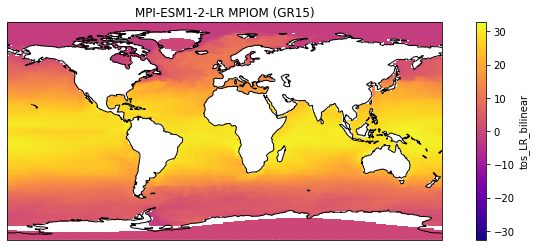

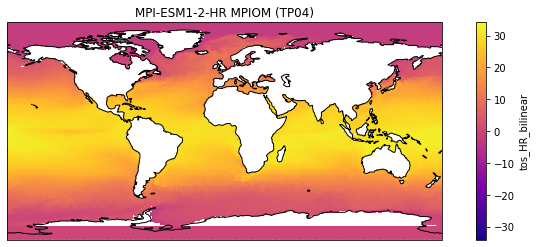

In [21]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_LR_bilinear"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-LR MPIOM (GR15)');

plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
ds_out["tos_HR_bilinear"].isel(time=0).plot.pcolormesh(ax=ax, x='lon', y='lat', cmap="plasma");
ax.coastlines();
ax.set_title('MPI-ESM1-2-HR MPIOM (TP04)');

In [22]:
# Mask values == 0 in regridded data (TODO: general solution required in the future!)
#for method in method_list:
#    ds_out["tas_"+method]=ds_out["tas_"+method].where(ds_out["tas_bilinear"]>0)

In [23]:
# Set longitude range to [-180, 180] for input grid before final comparison
# ds["lon"]=ds["lon"].where(ds["lon"]<=180,ds["lon"]-360. )

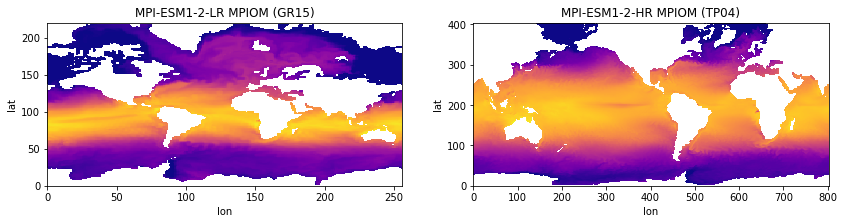

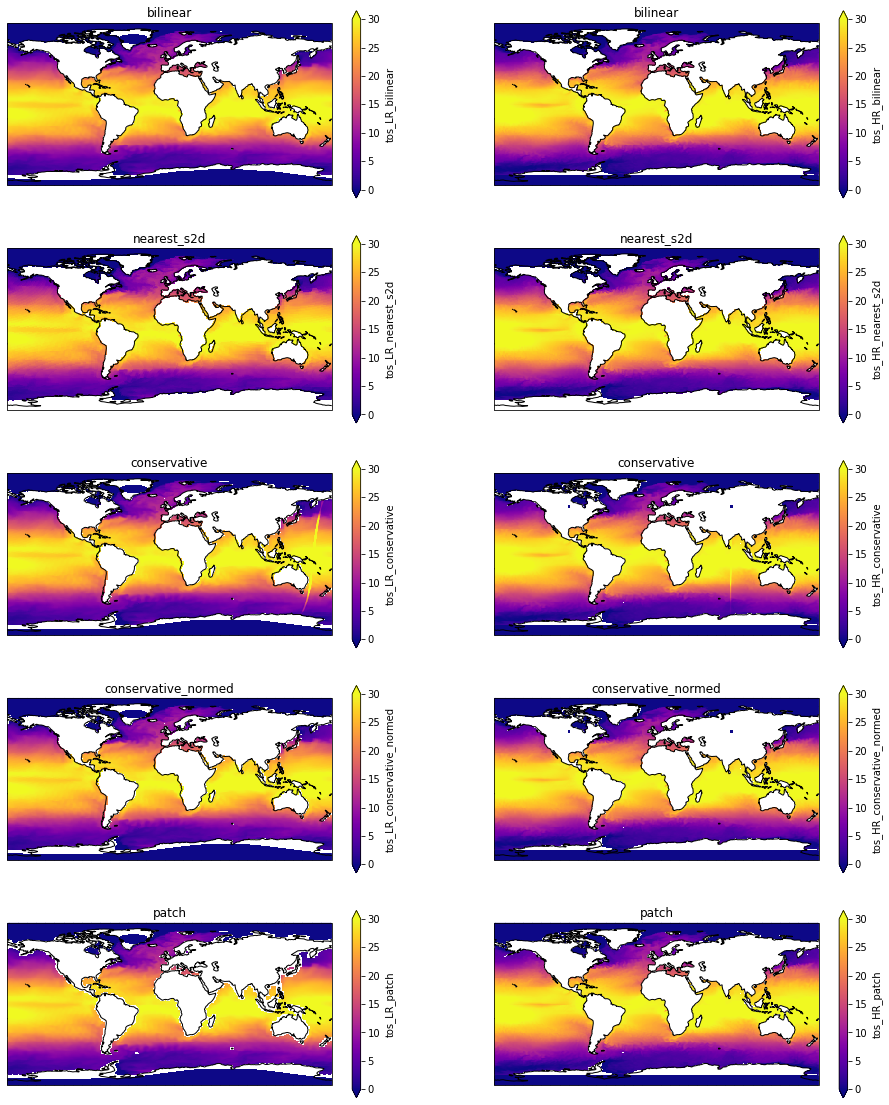

In [24]:
# Create 1st panel plot (data on original grid)
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 3))

axes[0].pcolormesh(ds_sspLR.tos.isel(time=0).values[::-1,:], cmap="plasma")
axes[1].pcolormesh(ds_sspHR.tos.isel(time=0).values[::-1,:], cmap="plasma")  
axes[0].set_xlabel('lon');
axes[0].set_ylabel('lat');
axes[0].set_title('MPI-ESM1-2-LR MPIOM (GR15)');
axes[1].set_xlabel('lon');
axes[1].set_ylabel('lat');
axes[1].set_title('MPI-ESM1-2-HR MPIOM (TP04)');



# Create 2nd panel plot (regridded data)
fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         figsize=(16, 4*len(method_list)), # global
                         #figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 

    # Coast lines and limits
    ax.coastlines()   
    #ax.set_ylim([25, 50]);
    #ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

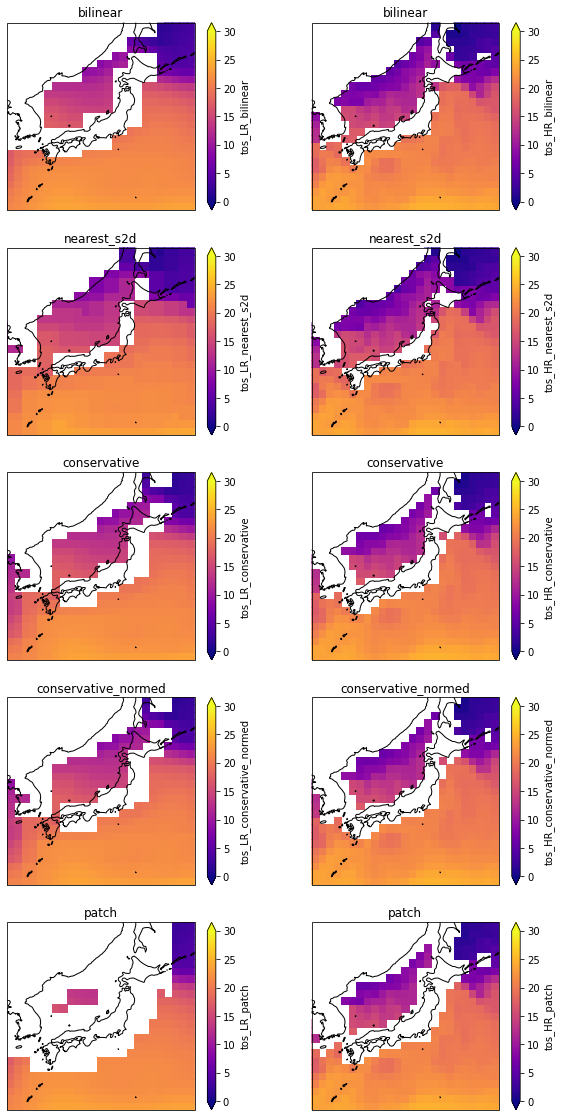

In [25]:
# Create 2nd panel plot to only include Japan (regridded data)
fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         #figsize=(16, 4*len(method_list)), # global
                         figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 

    # Coast lines and limits
    ax.coastlines()   
    ax.set_ylim([25, 50]);
    ax.set_xlim([125, 150]);
    
    # increment
    i+=1  

Patch does not seem to be the first choice for masked data, and so does nearest_s2d.

### Mask data on the destination grid that has no expression on the source grid
This has still to be adressed. With the exception of nearest-neighbour interpolation this data is set to 0 by xESMF. Is there a method within ESMPy/xESMF to set this values to NaN instead?

A workaround (for anything but nearest-neighbour) might be to regrid a mask using the same weights and set all outcoming values==0 to NaN:

In [26]:
# Define the source-grid masks by setting all data values to 1
# (I imagine setting all NaN values to 0 might prevent one from using the same regridding weights)

ds_sspLR["mask_LR"]=xr.ufuncs.isnan(ds_sspLR["tos"].isel(time=0))
ds_sspLR["mask_LR"]=xr.where(ds_sspLR["mask_LR"]==0,1,np.nan)

ds_sspHR["mask_HR"]=xr.ufuncs.isnan(ds_sspHR["tos"].isel(time=0))
ds_sspHR["mask_HR"]=xr.where(ds_sspHR["mask_HR"]==0,1,np.nan)

In [27]:
# Regrid these "masks" using the weights generated above

for method in method_list:
    ds_out["mask_LR_"+method]=regridderLR[method](ds_sspLR.mask_LR)
    ds_out["mask_HR_"+method]=regridderHR[method](ds_sspHR.mask_HR)

/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
/home/dkrz/k204212/conda-envs/xesmf0pt4/lib/python3.8/site-packages/xesmf-0.4.0-py3.8.egg/xesmf/frontend.py:450: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be r

In [28]:
# Apply the masks on the regridded data

for method in method_list:
    ds_out["tos_LR_"+method]=xr.where(ds_out["mask_LR_"+method]==0, np.nan, ds_out["tos_LR_"+method])
    ds_out["tos_HR_"+method]=xr.where(ds_out["mask_HR_"+method]==0, np.nan, ds_out["tos_HR_"+method])

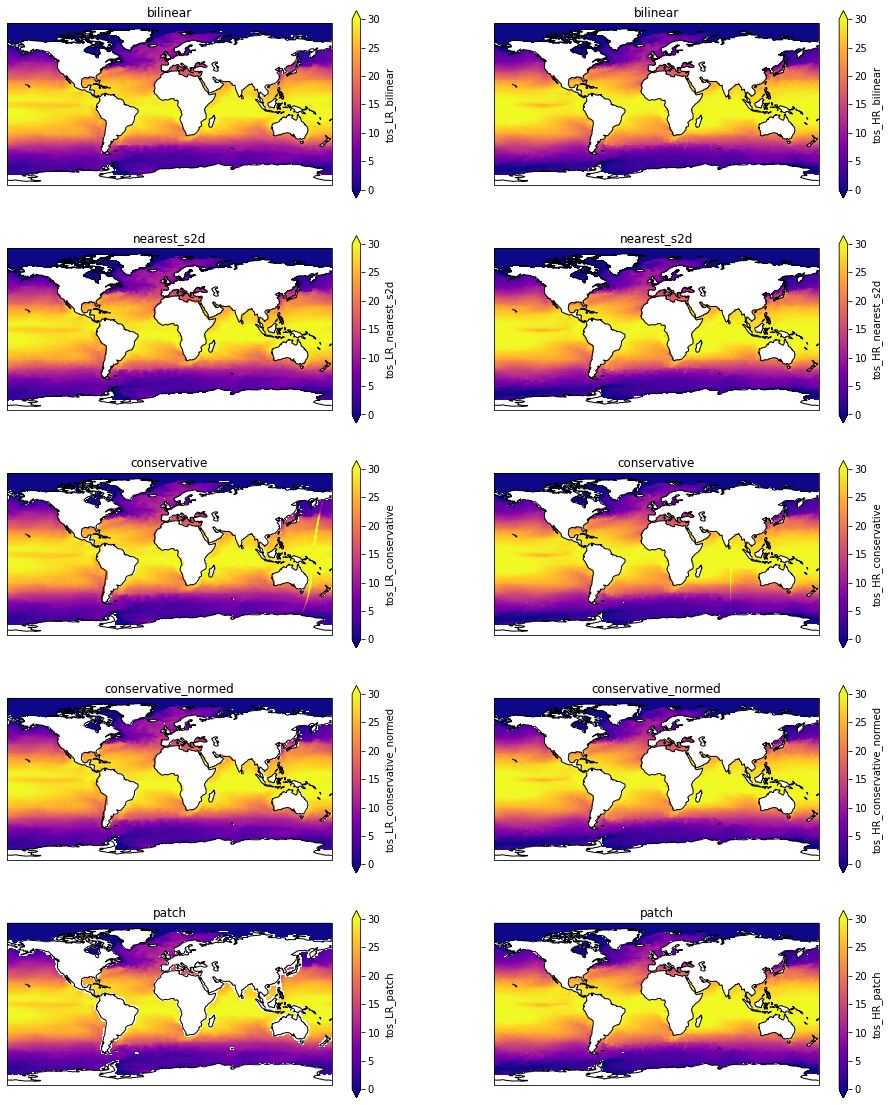

In [29]:
# Produce above plots again to see that unmatched cells should be masked now 
#  (except for nearest_s2d, however the area is already masked in this case, but why?)

fig, axes = plt.subplots(ncols=2, nrows=len(method_list), 
                         figsize=(16, 4*len(method_list)), # global
                         #figsize=(10, 4*len(method_list)), # Japan
                         subplot_kw={'projection': ccrs.PlateCarree()})

i=0
for ax in axes.flat:
    if i%2==0:
        # Regridded data (from LR)
        method=method_list[int(i/2)]
        ds_out["tos_LR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 
    else:
        # Regridded data (from HR)        
        ds_out["tos_HR_"+method].isel(time=0).plot.pcolormesh(ax=ax, vmin=0, vmax=30, cmap="plasma")
        ax.title.set_text(method); 

    # Coast lines and limits
    ax.coastlines()   
    #ax.set_ylim([25, 50]);
    #ax.set_xlim([125, 150]);
    
    # increment
    i+=1  